In [4]:
from model_tbyt_2 import GPT, GPTConfig
import torch
import os
itr_num = 20000
#block_size = 8
#vocab_size = 128
block_size = 32
vocab_size = 128
device = 'cpu'
config = GPTConfig(block_size=block_size, vocab_size=vocab_size)
model = GPT(config)
model_state_dict = torch.load(os.path.join(os.getcwd(), f'saved_models/tbyt_1head_2_itr:{itr_num}_checkpoint_old.pt'), map_location=device)['model']
#model_state_dict = torch.load('./saved_models/tbyt_b64_v2048_embd16_1head_2_itr:20000_checkpoint.pt', map_location=device)['model']
model.load_state_dict(model_state_dict)
model.to(device=device)

Im in GPT instructor
i initialized n-layers
im in block instructor
bias diag is  tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
i initialized everying in block
im in block instructor
bias diag is  tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
i initialized everying in block
i initialized transformer
I have initialized all the variables in GPT instructor


GPT(
  (transformer): ModuleDict(
    (wte): Embedding(129, 64)
    (wpe): Embedding(129, 64)
    (h): ModuleList(
      (0-1): 2 x Block(
        (c_attn): CasualSelfAttention(
          (c_attn): Linear(in_features=64, out_features=192, bias=True)
          (c_proj): Linear(in_features=64, out_features=64, bias=True)
        )
        (c_fc): MLP(
          (fc_1): Linear(in_features=64, out_features=192, bias=True)
          (gelu): GELU(approximate='tanh')
          (fc_2): Linear(in_features=192, out_features=64, bias=True)
        )
        (ln_1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ln_2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      )
    )
    (ln_f): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=64, out_features=128, bias=False)
)

In [5]:
batch_size = 1
#test_1_seq = torch.cat((torch.arange(110, 30, -5) , torch.arange(127, 111, -1)), dim=0) 
#print(test_1_seq)
def get_batch():
   def cat_sorted_tensor(x):
      #x, _ = torch.sort(x, descending=True)
      #x = torch.cat((torch.tensor([100]).repeat(16), torch.tensor([1]).repeat(16)))
      #x = torch.tensor([100,100,100,100,1,1,1,1])
      vals, _ = torch.sort(x)
      #vals2, _ = torch.sort(x, descending=True)
      #print('vals are ', vals)
      return torch.cat((x, torch.tensor([vocab_size]), vals), dim=0)
   #x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:block_size]) for _ in range(batch_size)])
   x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:32]) for _ in range(batch_size)])
   return x

im here!!! tensor([[[ 0.0594,  0.0963, -0.0752,  ..., -0.0713, -0.0053,  0.0510],
         [-0.0165,  0.0250, -0.0701,  ..., -0.0424,  0.0003,  0.0599],
         [-0.0016, -0.0824,  0.0479,  ...,  0.0414, -0.0306,  0.0056],
         ...,
         [-0.1143,  0.0458, -0.0484,  ..., -0.1744,  0.0183,  0.0333],
         [-0.1282,  0.0909, -0.0632,  ..., -0.1148, -0.0292,  0.0236],
         [-0.0614,  0.0799, -0.1199,  ..., -0.0707,  0.0041,  0.0361]]],
       grad_fn=<AddBackward0>)
x shape is  torch.Size([1, 65, 64])
thissss is  None
S is 


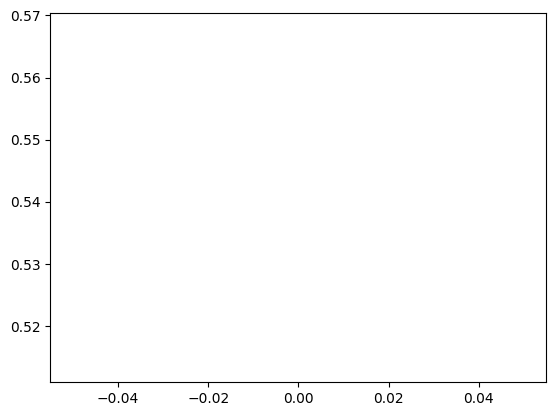

x shape is  torch.Size([1, 65, 64])
thissss is  None
norm without residual  tensor(4.8799, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(3.6473, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([1, 65, 64])
thissss is  tensor([[[ 0.0524,  0.0858, -0.0639,  ..., -0.0706, -0.0103,  0.0407],
         [-0.0153,  0.0229, -0.0596,  ..., -0.0331, -0.0005,  0.0545],
         [-0.0055, -0.0915,  0.0541,  ...,  0.0425, -0.0379, -0.0049],
         ...,
         [-0.0714,  0.0578, -0.0697,  ..., -0.0754,  0.0482, -0.0030],
         [-0.0705,  0.0772, -0.0938,  ..., -0.0653,  0.0605,  0.0331],
         [-0.0246,  0.0719, -0.1179,  ..., -0.0546,  0.0400,  0.0105]]],
       grad_fn=<EmbeddingBackward0>)
im here!!!  torch.Size([1, 1, 65, 65])
im doing the additional work!!
im here!!! tensor([[[  7.4723,  19.3974,  -9.5113,  ..., -32.2101,  24.2752, -16.9022],
         [  7.7055,  17.6459,  -6.7963,  ..., -20.1624,  16.4664, -14.2140],
         [ -8.3843,   7.1265, -21.4465

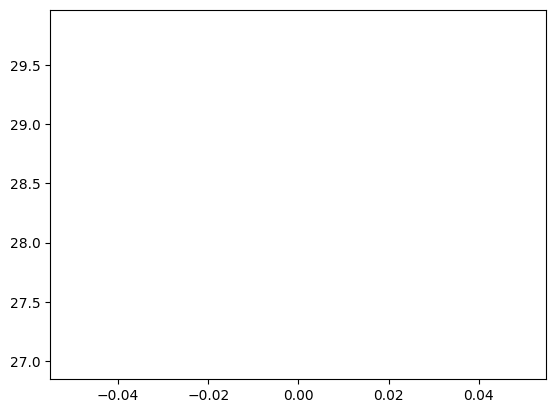

x shape is  torch.Size([1, 65, 64])
thissss is  None
norm without residual  tensor(283.4445, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(1130.7771, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([1, 65, 64])
thissss is  None
im here!!!  torch.Size([1, 1, 65, 65])
loss is  52.639671325683594
idx is: tensor([[ 92,  90,  24,  72,   3, 107,  56,   8, 110, 123,  97,  78,  76, 102,
         119,  93,  25, 122,  30,  81,   5,  66,  13,  48,  95,  88,  20, 105,
          51,  44,   2,  37, 128,  50, 110,   5,   8,  13,  20,  24,  25,  30,
          37,  44,  48,  51,  56,  66,  72,  76,  78,  81,  88,  90,  92,  93,
          95,  97, 102, 105, 107, 110, 119, 122, 123]])
result is: tensor([[  5, 120,  14,  12,   6, 122,  49,   6, 126, 123,   5,  12,  67, 123,
         123,   4,  15, 123,  20,   1,   6,  12,   9,  49,   4, 119,  15, 124,
          49,  32,   5,  32,   2,  48, 107,   8,  13,  20,  24,  25,  30,  37,
          43,  48,  53,  63,  73,  72,  76,  77

In [ ]:

##just testing the output
idx = get_batch()
idx[0,43] = 50
idx[0,44] = 110
#x, _ = torch.sort(x[0])
#x = torch.unsqueeze(x, dim=0)

logits, loss = model(idx)
#logits, loss = model.without_pos_embd(idx)
print('loss is ', loss.item())
print(f'idx is: {idx}')
print(f'result is: {torch.argmax(logits, dim=-1)}')

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
y is  tensor([[[-41.7095,  28.3603, -40.8277,  ...,  -0.2002,  33.2689, -40.6089],
         [-40.5360,  32.5772, -37.5167,  ...,  -0.3315,  35.3155, -47.8933],
         [-42.7194,  33.6327, -39.8425,  ...,   3.7847,  33.5289, -48.8603],
         ...,
         [-15.9377,  15.5737, -16.5924,  ...,  -6.7687,  13.8891,  -6.3498],
         [-24.7355,  22.8390, -24.2396,  ...,   1.8419,  19.3463, -25.7561],
         [  0.9190,   2.4825,  -2.7166,  ...,  -5.2190,   0.7623,   6.2476]]],
       grad_fn=<AddBackward0>)
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn scores of layer 0 is tensor([[[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.5928, 0.4072, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.4368, 0.3930, 0.1702,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2995, 0.2

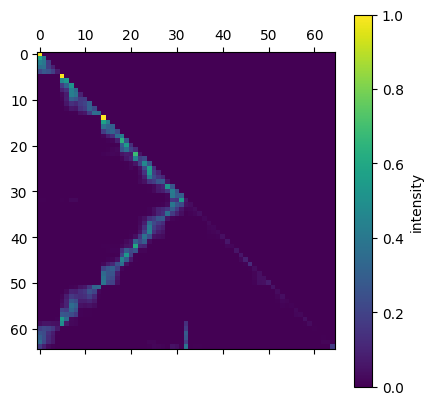

second x is  tensor([[[-41.7095,  28.3603, -40.8277,  ...,  -0.2002,  33.2689, -40.6089],
         [-40.5360,  32.5772, -37.5167,  ...,  -0.3315,  35.3155, -47.8933],
         [-42.7194,  33.6327, -39.8425,  ...,   3.7847,  33.5289, -48.8603],
         ...,
         [-15.9377,  15.5737, -16.5924,  ...,  -6.7687,  13.8891,  -6.3498],
         [-24.7355,  22.8390, -24.2396,  ...,   1.8419,  19.3463, -25.7561],
         [  0.9190,   2.4825,  -2.7166,  ...,  -5.2190,   0.7623,   6.2476]]],
       grad_fn=<AddBackward0>)


In [5]:
## manually calculating the layer norms!!

B, T = idx.size()
pos = model.transformer.wpe(torch.arange(T).to(device))
x = model.transformer.wte(idx) + pos
y = model.transformer.h[0](x)
print('y is ', y)
x0 = x
x = x - model.means[0, :, :]
x = x / model.norms[0, :, :]
x = x * model.transformer.h[0].ln_1.weight + model.transformer.h[0].ln_1.bias
x = x0 + model.transformer.h[0].c_attn(x, 0)
## now MLP
x1 = x
x = x - model.transformer.h[0].meanval
x = x / model.transformer.h[0].normval
x = x * model.transformer.h[0].ln_2.weight + model.transformer.h[0].ln_2.bias
x = x1 + model.transformer.h[0].c_fc(x)
print('second x is ', x)

In [4]:
qweights, kweights, vweights = model.transformer.h[0].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)
model.transformer.wte.weight.shape

torch.Size([129, 64])

In [ ]:
## taking the SVD decomposition of wpe matrix

#tmp1 = model.transformer.wpe.weight / torch.norm(model.transformer.wpe.weight, dim=1).view(model.transformer.wpe.weight.size(0), 1)
#print(torch.norm(tmp1[14,:] - tmp1[8,:]))
print(torch.norm(model.transformer.wpe.weight[34,:]))
#S, V, D = torch.linalg.svd(model.transformer.wpe.weight[:32,:])
#plt.plot(V.detach().numpy())

tensor(0.2633, grad_fn=<LinalgVectorNormBackward0>)


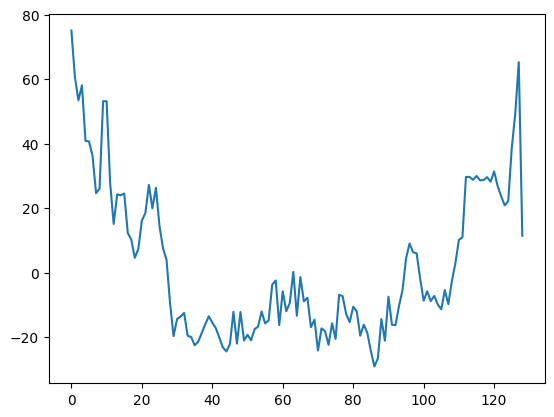

In [8]:
import matplotlib.pyplot as plt
scores = torch.tensor([1.2080e-04, 1.7336e-04, 6.1379e-06, 4.1702e-06, 6.2350e-06,
          3.9002e-05, 9.7805e-04, 4.6728e-03, 2.4274e-03, 1.5666e-04,
          1.2279e-04, 9.1291e-05, 2.2003e-04, 5.0898e-03, 5.5059e-05,
          4.3777e-04, 3.1849e-04, 5.7809e-07, 6.8402e-08, 2.0084e-08,
          1.1515e-10, 7.5004e-12, 3.9885e-12, 2.5423e-12, 8.1654e-09,
          3.8446e-06, 2.8228e-02, 3.9749e-02, 6.0743e-02, 9.3823e-02,
          4.9410e-01, 2.2653e-01, 1.7915e-02, 2.3985e-02, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]).unsqueeze(-1)
#print('scores sum ', scores.sum(dim=0))
T = 65
#print((scores * model.transformer.h[0].ln_1(model.transformer.wte(idx))).shape)
#y = model.transformer.h[0].c_attn.c_proj(vweights @ ((scores * (model.transformer.h[0].ln_1(model.transformer.wte(idx[0,:]) + model.transformer.wpe(torch.arange(T))))).sum(dim=0)))
y = model.transformer.h[0].c_attn.c_proj(vweights @ model.transformer.h[0].ln_1(model.transformer.wte(idx[0,46]) - 0.6*model.transformer.wpe.weight[32,:]))
z = y + model.transformer.wte(idx[0,46]) - 0.6* model.transformer.wpe.weight[32,:]
#plt.plot((model.transformer.wte.weight @ z).detach().numpy())
plt.plot((model.transformer.wte.weight @ (z + model.transformer.h[0].c_fc(model.transformer.h[0].ln_2(z)))).detach().numpy())
#plt.plot((model.transformer.wte.weight @ vweights @ model.transformer.h[0].ln_1(model.transformer.wpe.weight[32,:])).detach().numpy())

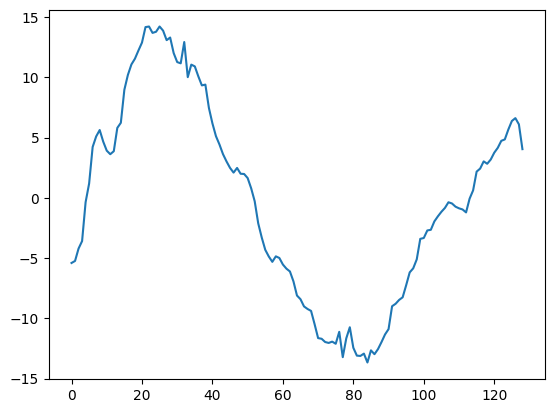

In [ ]:
import torch.nn.functional as F
#scores = (F.normalize(model.transformer.wpe.weight @  qweights.t(), p=2, dim=1) @ F.normalize(qweights @ model.transformer.wpe.weight.t(), p=2, dim=0)).detach().numpy()
scores = ((model.transformer.wte.weight @  qweights.t()) / torch.norm((model.transformer.wte.weight + model.transformer.wpe.weight), dim=1).view(model.transformer.wpe.weight.size(0), 1) 
          @ kweights @ model.transformer.wte.weight.t() / torch.norm((model.transformer.wpe.weight + model.transformer.wte.weight), dim=1).view(1, model.transformer.wpe.weight.size(0))).detach().numpy()

import numpy as np
U, S, Vh = np.linalg.svd(scores)
#plt.plot(S[:])

#scores = (model.transformer.wte.weight @ model.transformer.wte.weight.t()).detach().numpy()
import matplotlib.pyplot as plt
#plt.matshow(scores[127:,127:])
#plt.colorbar()
#plt.show()
plt.plot(scores[20, :])
print('scores ', scores[20,:25])

In [8]:
torch.norm(model.transformer.wpe.weight / (torch.norm(model.transformer.wpe.weight + model.transformer.wte.weight, dim=1)).view(model.transformer.wpe.weight.size(0),1),dim=1).detach().numpy()

array([0.09380595, 0.1175398 , 0.1111477 , 0.11072489, 0.12972789,
       0.14281744, 0.14264655, 0.14315976, 0.15983695, 0.1273104 ,
       0.11826848, 0.11001614, 0.11493754, 0.13890882, 0.1069848 ,
       0.13382465, 0.12466118, 0.16113156, 0.16665271, 0.15363413,
       0.14333148, 0.145072  , 0.1630689 , 0.13488898, 0.13205463,
       0.14375505, 0.14190345, 0.16853623, 0.14609438, 0.155492  ,
       0.13639732, 0.13969693, 0.9229926 , 0.6360636 , 0.57455945,
       0.5410947 , 0.49532947, 0.482621  , 0.49725154, 0.48084083,
       0.45793873, 0.44308767, 0.4457935 , 0.46445963, 0.47107413,
       0.45597824, 0.43937048, 0.48023117, 0.46124333, 0.4655326 ,
       0.46210358, 0.45475888, 0.45237532, 0.4634895 , 0.4588894 ,
       0.46559435, 0.46316785, 0.4861825 , 0.5009505 , 0.55047524,
       0.55729973, 0.63471705, 0.73984474, 0.8540314 , 0.3446905 ,
       0.33390966, 0.3593928 , 0.3675981 , 0.37349707, 0.33640704,
       0.38013622, 0.33328533, 0.33377105, 0.28571755, 0.32462

In [ ]:
## print PE norms
import matplotlib.pyplot as plt
plt.plot(torch.norm(model.transformer.wpe.weight @ qweights.t() / torch.norm((model.transformer.wpe.weight + model.transformer.wte.weight), dim=1).view(model.transformer.wpe.weight.size(0), 1), dim=1).detach().numpy()[33:64])

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn[:,:,33,:] is  tensor([[[0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
          0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
          0.0613, 0.0611, 0.0612, 0.0611, 0.0612, 0.0617, 0.0610, 0.0612,
          0.0612, 0.0612, 0.0612, 0.0611, 0.0612, 0.0612, 0.0612, 0.0612,
          0.0064, 0.0103, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000]]], grad_fn=<SliceBackward0>)
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn[:,:,33,:] is  tensor([[[0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
          0.0003, 0.0003,

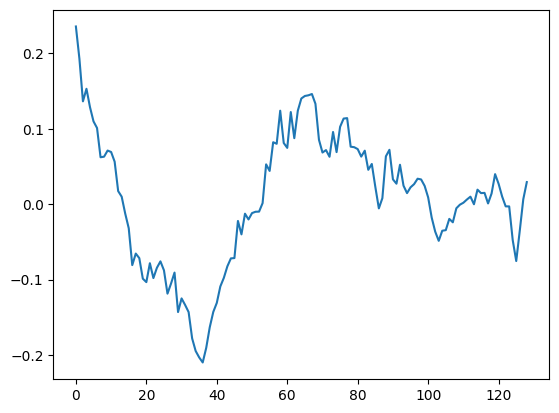

In [ ]:
## obtaining weights of second layer
qweights2, kweights2, vweights2 = model.transformer.h[1].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)

#half_res_stream_tmp = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wpe.weight.unsqueeze(0)))[0,...]
half_res_stream = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))[0,...]
res_stream_1_without_residual = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
#res_stream_1_without_residual = model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device)))
res_stream_1 = (model.transformer.h[0](model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
res_stream_1 = res_stream_1[0,...]
res_stream_2 = model.transformer.h[1](res_stream_1.unsqueeze(0))[0,...]
#scores = (res_stream_1 @  qweights.t() @ qweights @ res_stream_1.t()).detach().numpy()
## assuming almost orthogonality

#scores = (half_res_stream @ vweights @ model.transformer.wpe.weight.t()).detach().numpy()

#scores2 = (model.transformer.wte.weight @ half_res_stream_tmp.t()).detach().numpy()
scores3 = (res_stream_1 @ qweights2.t() @ kweights2 @ model.transformer.wte.weight.t()).detach().numpy()
word_indices = (res_stream_1_without_residual @ model.transformer.wte.weight.t()).detach().numpy()
#plt.matshow(word_indices)
#plt.plot(word_indices[41,:])

import matplotlib.pyplot as plt
#plt.matshow(scores[:, :])
#plt.plot(-scores[:,32] * 400.0)
#plt.plot(scores2[:,32] / (torch.norm(vweights @ model.transformer.wpe.weight[32,:]).detach().numpy() ** 2))
#plt.plot(scores2[:,32] / (torch.norm(model.transformer.wte.weight[32,:]).detach().numpy() ** 2))
print(word_indices.shape)
plt.plot(word_indices[0,60,:])

#plt.colorbar()
plt.show()
#plt.plot(scores[22, :])

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn[:,:,33,:] is  tensor([[[0.0476, 0.0455, 0.0466, 0.0470, 0.0475, 0.0476, 0.0472, 0.0467,
          0.0469, 0.0472, 0.0473, 0.0468, 0.0471, 0.0476, 0.0460, 0.0474,
          0.0137, 0.0137, 0.0137, 0.0136, 0.0135, 0.0135, 0.0135, 0.0133,
          0.0133, 0.0134, 0.0133, 0.0136, 0.0135, 0.0132, 0.0134, 0.0133,
          0.0198, 0.0131, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000]]], grad_fn=<SliceBackward0>)
norm without residual  tensor(91.4112, grad_fn=<LinalgVectorNormBackward0>)
residual part norm  tensor(4.1166, grad_fn=<LinalgVectorNormBackward0>)
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias i

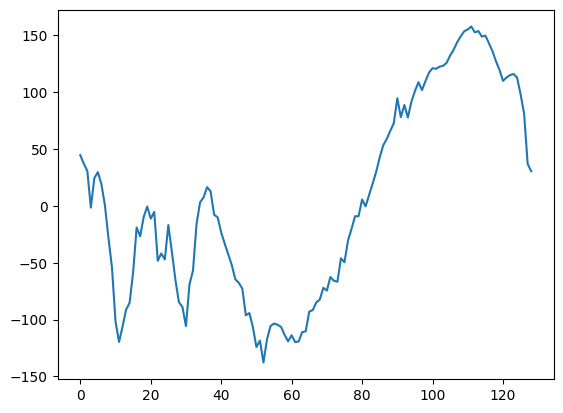

In [32]:
## feeding directly to second layer
word_proj = model.lm_head(model.transformer.h[1](model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
plt.plot(word_proj[0,34,:].detach().numpy())

In [20]:
hidden_projections = model.proj_on_embedding(idx, index=9)

x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])


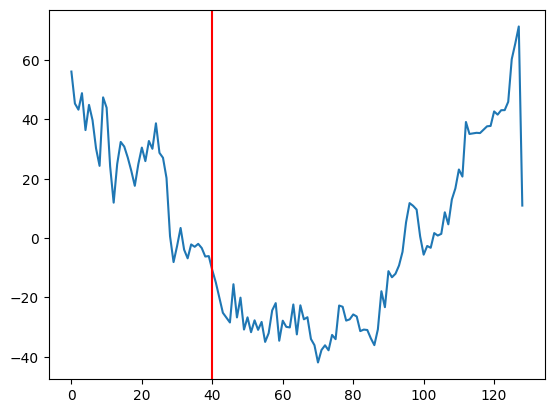

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(vocab_size + 1), hidden_projections[0, 1, :])
plt.axvline(x = 40.0, color='r')

In [50]:
proj_max_results = []
for layer in range(config.n_layers + 1):
    proj_max_result = []
    for index in range(config.block_size * 2 + 1):
        hidden_projections = model.proj_on_embedding(idx, index=index)
        proj_max_result.append(torch.argmax(hidden_projections[0, layer, :]).item())
    if layer > 0:
        proj_max_results.append([-1, *proj_max_result])
    else:
        proj_max_results.append([*proj_max_result, -1])
proj_max_results = torch.tensor(proj_max_results)


x shape is  torch.Size([1, 65, 64])
attn dim is  torch.Size([1, 1, 65, 65])
bias is  torch.Size([1, 1, 65, 65])
attn[:,:,33,:] is  tensor([[[1.8483e-01, 3.3997e-01, 2.4124e-01, 7.7809e-02, 5.0177e-02,
          3.5983e-02, 6.8439e-03, 8.0768e-04, 4.1406e-06, 7.1283e-07,
          7.0839e-09, 2.8695e-11, 3.8828e-12, 2.9385e-12, 1.4384e-11,
          2.9699e-11, 2.3959e-10, 8.0650e-09, 1.2794e-07, 2.5825e-04,
          2.6790e-05, 3.6659e-03, 7.4352e-04, 4.5857e-05, 8.9734e-04,
          2.5029e-03, 2.2811e-03, 6.6863e-05, 4.1267e-06, 2.9747e-04,
          1.0542e-03, 1.7331e-04, 1.9352e-02, 3.0967e-02, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e

In [51]:
proj_max_results

tensor([[  1,   2,   4,  10,  11,  12,  14,  16,  21,  23,  28,  36,  38,  46,
          48,  49,  54,  57,  59,  69,  72,  80,  83,  87,  91,  93,  99, 105,
         108, 116, 123, 125, 128,   0,   2,   4,  10,  11,  12,  14,  16,  21,
          23,  28,  36,  38,  46,  48,  49,  54,  57,  59,  69,  72,  80,  83,
          87,  91,  93,  99, 105, 108, 115, 123, 125,  -1],
        [ -1,   0,   0,   0,  10,  10,  10,   3,  11, 127, 127,  12,  16,  15,
          46, 127, 127, 127, 127, 127,  10,  10,   3,  11,  11,  12,   3,  12,
          11,  14,   0, 127, 127,   0,   0,   3,  10,  11,  11,  11,  14, 126,
          14,  14,  30,  31,  46,  46,  46,  46,  54,  56,  56,  71,  76,  84,
          75,  88,  84,   0,  97,  88, 124, 125, 127, 127],
        [ -1,   1,   2,   2,   9,   9,   9,   9,  16,   9,  15,  15,  26,  25,
          43,  45,  45,  49,  49,  10,  11,  12,   3,   3,  79,   3,   7,   7,
           7,   7, 121, 123, 125,   1,   2,   4,   9,  11,  12,  14,  16,  21,
          2

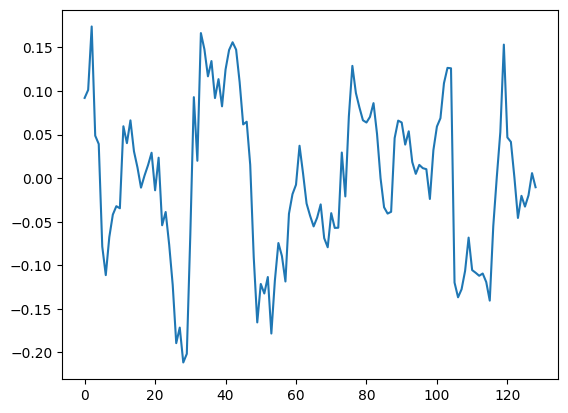

In [96]:
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
m = (model.transformer.wte.weight @ model.transformer.wte.weight.transpose(0,1)).detach().numpy()
eigs, eigvecs = np.linalg.eig(m)
plt.plot(eigvecs[:,5])
#plt.plot(m[91,:])

In [98]:
model.state_dict().keys()

odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.c_attn.bias', 'transformer.h.0.c_attn.c_attn.weight', 'transformer.h.0.c_attn.c_attn.bias', 'transformer.h.0.c_attn.c_proj.weight', 'transformer.h.0.c_attn.c_proj.bias', 'transformer.h.0.c_fc.fc_1.weight', 'transformer.h.0.c_fc.fc_1.bias', 'transformer.h.0.c_fc.fc_2.weight', 'transformer.h.0.c_fc.fc_2.bias', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.1.c_attn.bias', 'transformer.h.1.c_attn.c_attn.weight', 'transformer.h.1.c_attn.c_attn.bias', 'transformer.h.1.c_attn.c_proj.weight', 'transformer.h.1.c_attn.c_proj.bias', 'transformer.h.1.c_fc.fc_1.weight', 'transformer.h.1.c_fc.fc_1.bias', 'transformer.h.1.c_fc.fc_2.weight', 'transformer.h.1.c_fc.fc_2.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.2.c_attn.bias', 'transforme

In [114]:
model.transformer.h[0].c_attn.c_attn.weight.detach().numpy().shape
#eigvecs[:,0].shape

(192, 64)

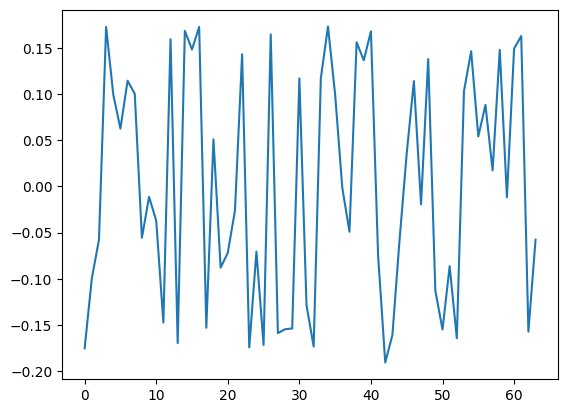

In [112]:
m = (model.transformer.wte.weight.transpose(0,1) @ model.transformer.wte.weight).detach().numpy()
eigs2, eigvecs2 = np.linalg.eig(m)
plt.plot(eigvecs2[:,1])

In [ ]:
plt.plot(model.lm_head(np.matmul(model.transformer.h[0].c_attn.c_attn.weight.detach().numpy(), eigvecs2[:,0])[:64]))